In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [113]:
#Read in the Dataset
df=pd.read_csv("survey.csv")
df.head()
df.tail()
#See if there are missing values in the Dataset:
df.isnull().sum()/df.shape[0]
#There are 41% missing values in State variable, 21% missing values in work_interefere,
#and 87% missing values in Comments.
df["state"]=df["state"].fillna(df["state"].mode())
df["work_interfere"]=df["work_interfere"].fillna(df["work_interfere"].mode())
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [114]:
#Get the basic information from df.info() in order to determine the variable types.
#df.info()
df.groupby("Country")[["benefits"]].value_counts()[46:50]
#df.describe(include="object").T

Country      benefits  
Mexico       Don't know     2
             No             1
Moldova      No             1
Netherlands  No            14
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Male'),
  Text(1, 0, 'male'),
  Text(2, 0, 'Female'),
  Text(3, 0, 'M'),
  Text(4, 0, 'female'),
  Text(5, 0, 'F'),
  Text(6, 0, 'm'),
  Text(7, 0, 'f'),
  Text(8, 0, 'Make'),
  Text(9, 0, 'Male '),
  Text(10, 0, 'Woman'),
  Text(11, 0, 'Cis Male'),
  Text(12, 0, 'Man'),
  Text(13, 0, 'Female (trans)'),
  Text(14, 0, 'Female '),
  Text(15, 0, 'Trans woman'),
  Text(16, 0, 'msle'),
  Text(17, 0, 'male leaning androgynous'),
  Text(18, 0, 'Neuter'),
  Text(19, 0, 'cis male'),
  Text(20, 0, 'queer'),
  Text(21, 0, 'Female (cis)'),
  Text(22, 0, 'Mail'),
  Text(23, 0, 'cis-female/femme'),
  Text(24, 0, 'A little about you'),
  Text(25, 0, 'Malr'),
  Text(26, 0, 'p'),
  Text(27, 0, 'femail'),
  Text(28, 0, 'Cis Man'),
  Text(29, 0, 'Guy (-ish) ^_^'),
  Text(3

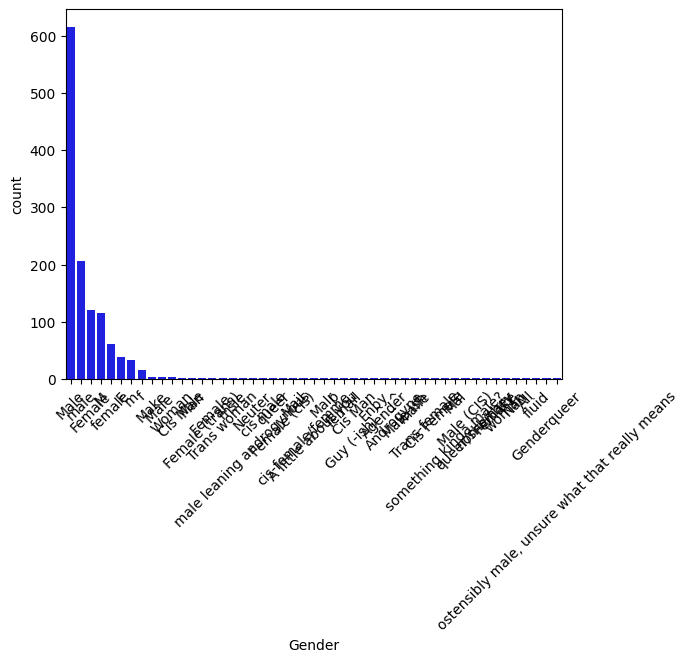

In [115]:
sns.countplot(x="Gender", data=df, color="blue", order=df["Gender"].value_counts().index)
plt.xticks(rotation=45)

<Axes: xlabel='phys_health_consequence', ylabel='count'>

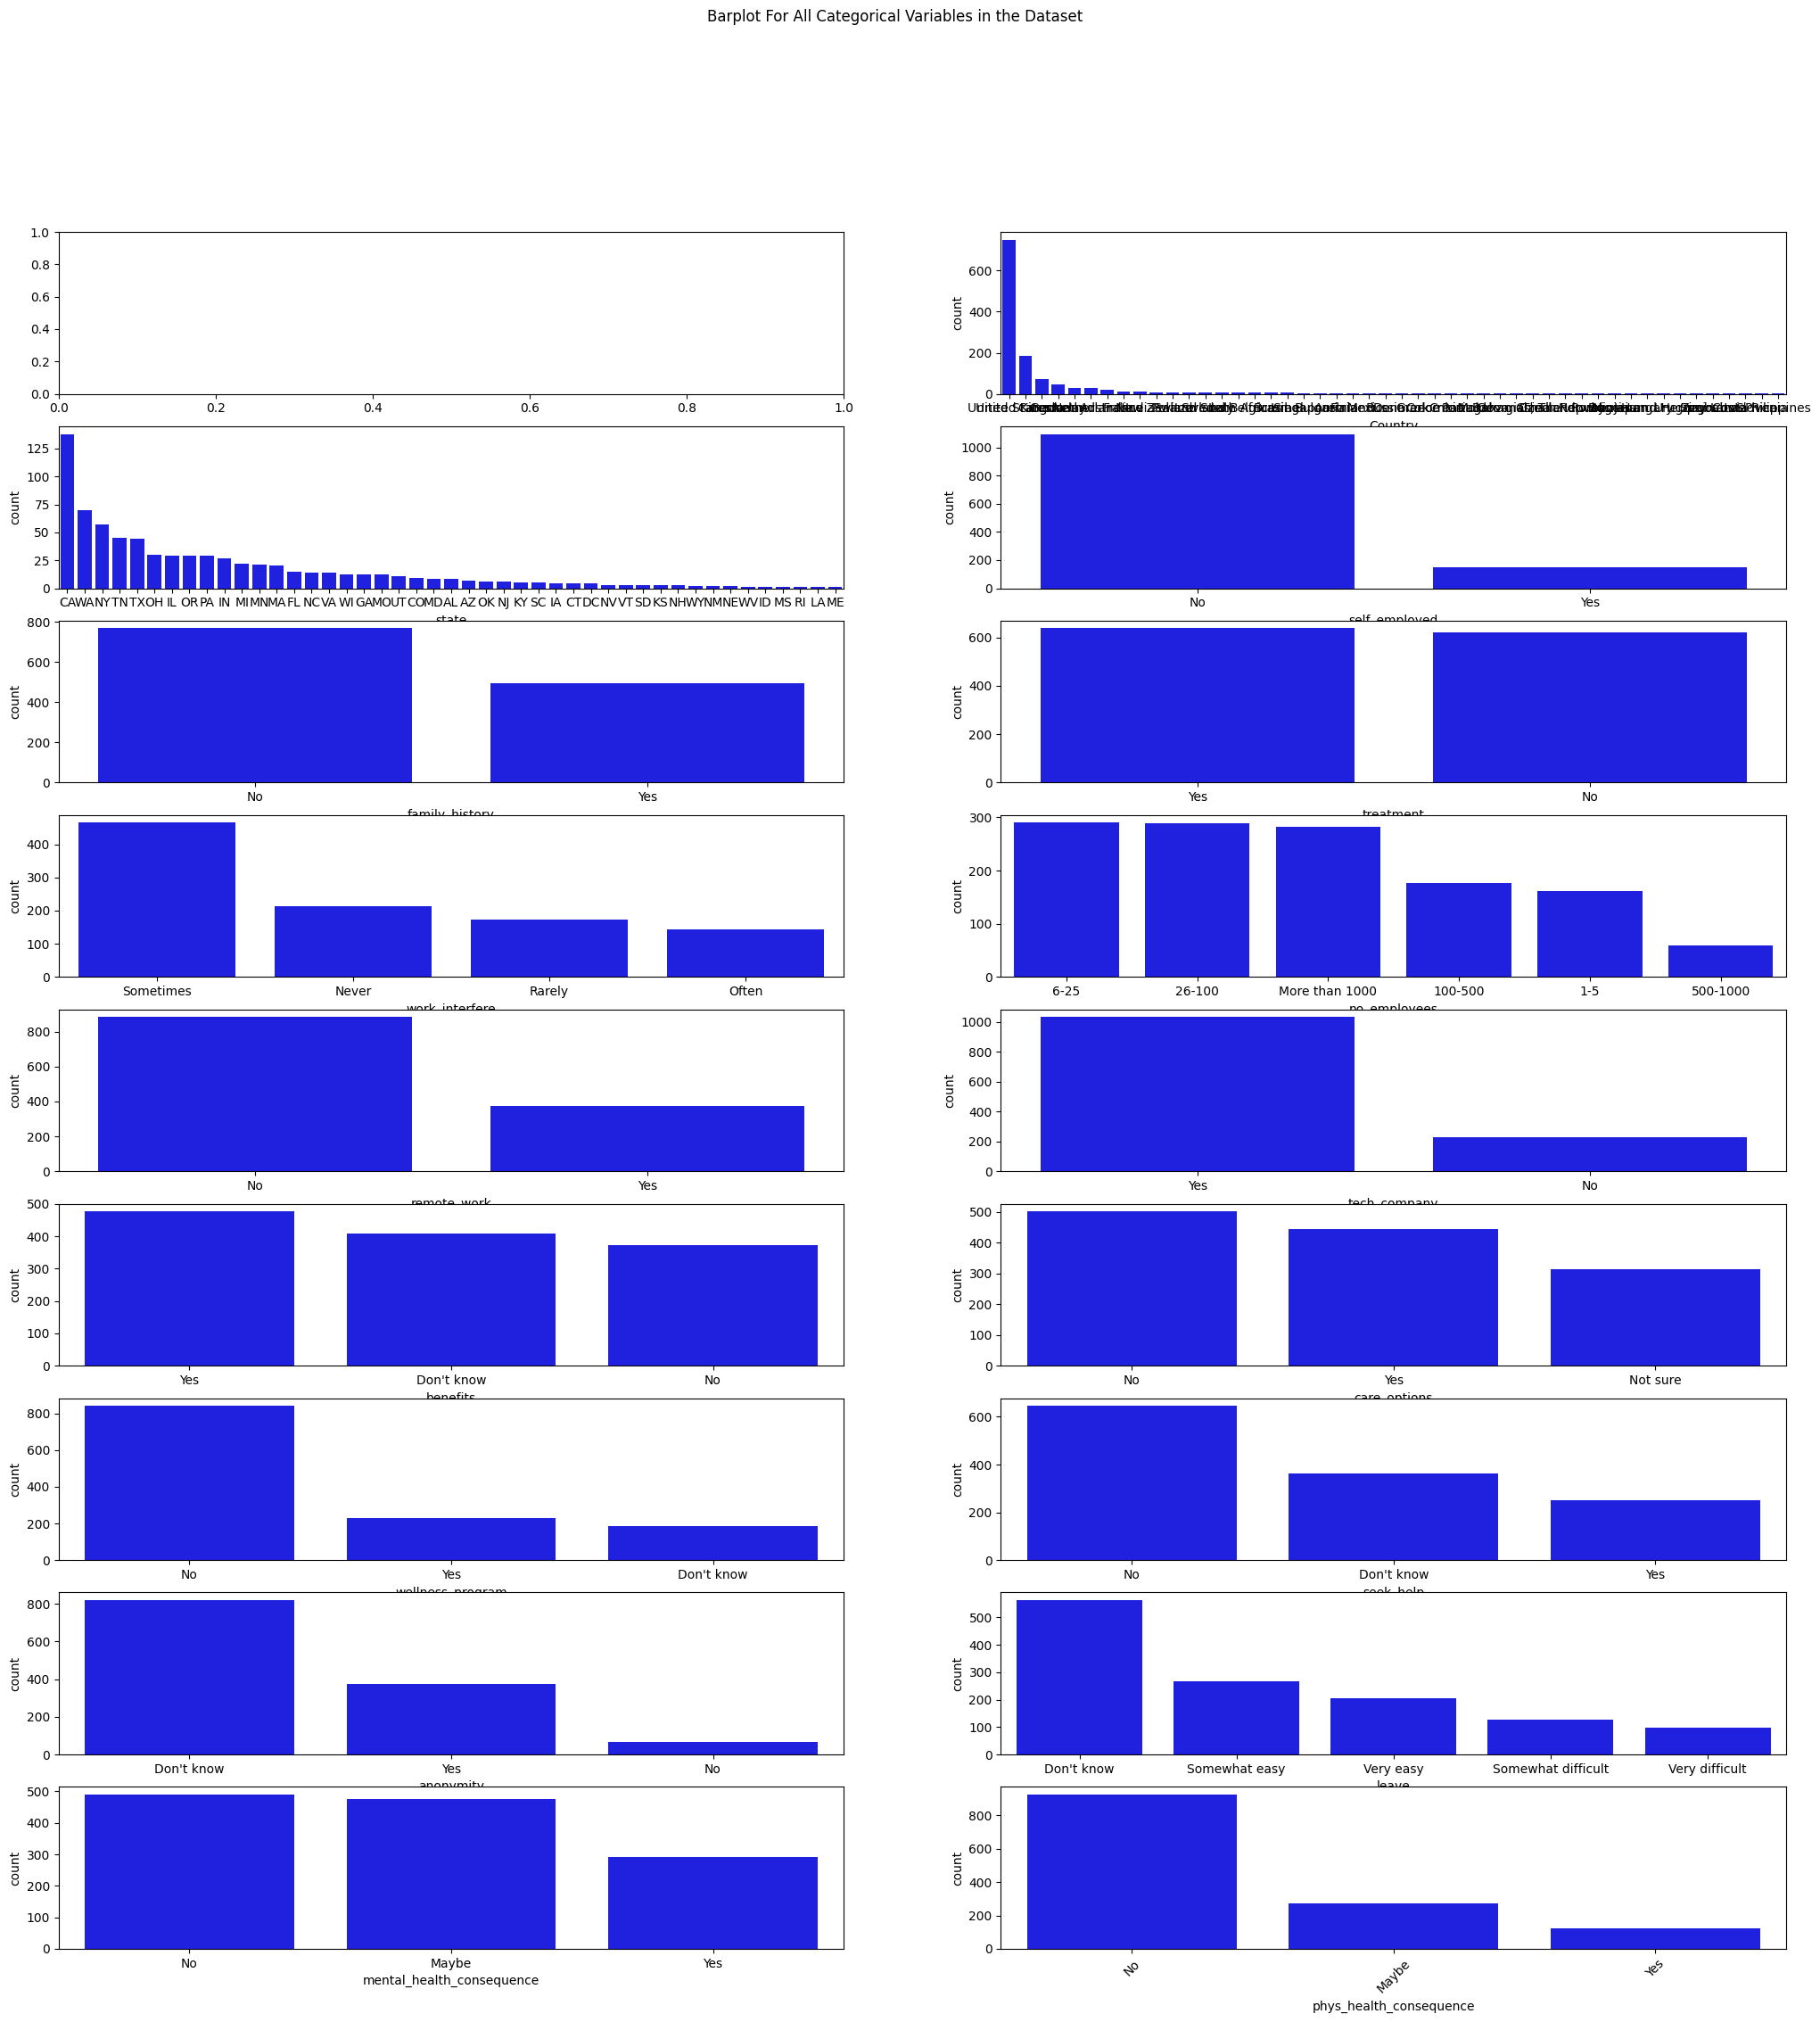

In [116]:
fig,axes = plt.subplots(9,2,figsize=(25,25))
fig.suptitle("Barplot For All Categorical Variables in the Dataset")
sns.countplot(x="Gender", data=df, color="blue", order=df["Gender"].value_counts().index)
plt.xticks(rotation=45)
sns.countplot(ax=axes[0,1], x="Country", data=df, color="blue", order=df["Country"].value_counts().index)
plt.xticks(rotation=90)
sns.countplot(ax=axes[1,0], x="state", data=df, color="blue", order=df["state"].value_counts().index)
plt.xticks(rotation=45)
sns.countplot(ax=axes[1,1], x="self_employed", data=df, color="blue", order=df["self_employed"].value_counts().index)
plt.xticks(rotation=45)
sns.countplot(ax=axes[2,0], x="family_history", data=df, color="blue", order=df["family_history"].value_counts().index)
plt.xticks(rotation=45)
sns.countplot(ax=axes[2,1], x="treatment", data=df, color="blue", order=df["treatment"].value_counts().index)
sns.countplot(ax=axes[3,0], x="work_interfere", data=df, color="blue", order=df["work_interfere"].value_counts().index)
sns.countplot(ax=axes[3,1], x="no_employees", data=df, color="blue", order=df["no_employees"].value_counts().index)
sns.countplot(ax=axes[4,0], x="remote_work", data=df, color="blue", order=df["remote_work"].value_counts().index)
sns.countplot(ax=axes[4,1], x="tech_company", data=df, color="blue", order=df["tech_company"].value_counts().index)
sns.countplot(ax=axes[5,0], x="benefits", data=df, color="blue", order=df["benefits"].value_counts().index)
sns.countplot(ax=axes[5,1], x="care_options", data=df, color="blue", order=df["care_options"].value_counts().index)

sns.countplot(ax=axes[6,0], x="wellness_program", data=df, color="blue", order=df["wellness_program"].value_counts().index)

sns.countplot(ax=axes[6,1], x="seek_help", data=df, color="blue", order=df["seek_help"].value_counts().index)

sns.countplot(ax=axes[7,0], x="anonymity", data=df, color="blue", order=df["anonymity"].value_counts().index)

sns.countplot(ax=axes[7,1], x="leave", data=df, color="blue", order=df["leave"].value_counts().index)
sns.countplot(ax=axes[8,0], x="mental_health_consequence", data=df, color="blue", order=df["mental_health_consequence"].value_counts().index)
sns.countplot(ax=axes[8,1], x="phys_health_consequence", data=df, color="blue", order=df["phys_health_consequence"].value_counts().index)


In [117]:
df.Gender.value_counts()

df["Gender"]=df["Gender"].apply(lambda x: "Female" if x=="female" or x=="F" or x=="f" or x=="Woman" or x=="Female (trans)" or x=="Female" else x)
df["Gender"]=df["Gender"].apply(lambda x: "Male" if x=="male" or x=="M" or x=="m" or x=="Make" or x=="Male" or x=="Man" or x=="Cis Male" or x=="male leaning androgynous" or x=="msle" or x=="Mail" or x=="cis male" else x)

In [118]:
subset=df[df["Gender"].isin(['Male-ish','maile','Trans-female','Cis Female','something kind male?','cis-female/femme','ostensibly male, unsure what that really means','p','Malr','A little about you','Female (cis)','femail','Neuter','Trans woman','Cis Man','Guy (-ish) ^_^','cis-female/femme)','Agender','Androgyne','queer','Genderqueer','fluid','Enby','All','Nah','woman','Femake','non-binary','queer/she/they','Male (CIS)','Mal'])]


In [119]:
df=df.drop(subset.index)

In [120]:
len(df)

1230

In [121]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [122]:
df["Country"].value_counts()

United States             735
United Kingdom            179
Canada                     71
Germany                    43
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Sweden                      7
Poland                      7
Brazil                      6
South Africa                6
Belgium                     6
Italy                       5
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Finland                     3
Russia                      3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Czech Repu

In [123]:
df.describe().T
df.describe(exclude="number").T
#For Females, 2:1 Seek Treatment:Don't Seek Treatment. For Males, 1:1 Seek Treatment:Don't Seek Treatment.
df.groupby("Gender")["treatment"].value_counts()

Gender                 treatment
Female                 Yes          168
                       No            73
Female                 No             1
                       Yes            1
Male                   No           538
                       Yes          445
Male                   Yes            2
                       No             1
something kinda male?  No             1
Name: treatment, dtype: int64

In [124]:
cat_col = ['comments','obs_consequence','mental_vs_physical','phys_health_interview','mental_health_interview','supervisor','coworkers','phys_health_consequence','mental_health_consequence','leave','anonymity','seek_help','wellness_program','care_options','benefits','tech_company','remote_work','no_employees','work_interfere','treatment','family_history','self_employed','state','Country','Gender']

# Printing number of count of each unique value in each column

for column in cat_col:
    print(df[column].value_counts())

    print('-' * 50)

* Small family business - YMMV.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           5
I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.                                                                                                      

In [125]:
df.groupby("Country")[["Gender"]].value_counts()[0:40]

Country                 Gender
Australia               Male      16
                        Female     5
Austria                 Male       3
Belgium                 Male       4
                        Female     2
Bosnia and Herzegovina  Male       1
Brazil                  Male       6
Bulgaria                Male       3
                        Female     1
Canada                  Male      56
                        Female    14
                        Male       1
China                   Male       1
Colombia                Male       2
Costa Rica              Male       1
Croatia                 Male       2
Czech Republic          Male       1
Denmark                 Male       2
Finland                 Male       3
France                  Male      13
Georgia                 Male       1
Germany                 Male      42
                        Female     1
Greece                  Male       2
Hungary                 Female     1
India                   Male       8
       

In [126]:
df.pickup_dt = pd.to_datetime(df.Timestamp)
# Extracting date parts from pickup_dt
df['start_year'] = df.pickup_dt.dt.year
df['start_month'] = df.pickup_dt.dt.month
df['start_hour'] = df.pickup_dt.dt.hour
df['start_day'] = df.pickup_dt.dt.day
df['week_day'] = df.pickup_dt.dt.day_name()

<ipython-input-126-2a60b108b18b>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.pickup_dt = pd.to_datetime(df.Timestamp)


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 1258
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1230 non-null   object
 1   Age                        1230 non-null   int64 
 2   Gender                     1230 non-null   object
 3   Country                    1230 non-null   object
 4   state                      727 non-null    object
 5   self_employed              1212 non-null   object
 6   family_history             1230 non-null   object
 7   treatment                  1230 non-null   object
 8   work_interfere             969 non-null    object
 9   no_employees               1230 non-null   object
 10  remote_work                1230 non-null   object
 11  tech_company               1230 non-null   object
 12  benefits                   1230 non-null   object
 13  care_options               1230 non-null   object
 14  wellness

In [128]:
import seaborn as sns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 1258
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1230 non-null   object
 1   Age                        1230 non-null   int64 
 2   Gender                     1230 non-null   object
 3   Country                    1230 non-null   object
 4   state                      727 non-null    object
 5   self_employed              1212 non-null   object
 6   family_history             1230 non-null   object
 7   treatment                  1230 non-null   object
 8   work_interfere             969 non-null    object
 9   no_employees               1230 non-null   object
 10  remote_work                1230 non-null   object
 11  tech_company               1230 non-null   object
 12  benefits                   1230 non-null   object
 13  care_options               1230 non-null   object
 14  wellness

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 1258
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1230 non-null   object
 1   Age                        1230 non-null   int64 
 2   Gender                     1230 non-null   object
 3   Country                    1230 non-null   object
 4   state                      727 non-null    object
 5   self_employed              1212 non-null   object
 6   family_history             1230 non-null   object
 7   treatment                  1230 non-null   object
 8   work_interfere             969 non-null    object
 9   no_employees               1230 non-null   object
 10  remote_work                1230 non-null   object
 11  tech_company               1230 non-null   object
 12  benefits                   1230 non-null   object
 13  care_options               1230 non-null   object
 14  wellness

<Axes: xlabel='start_hour', ylabel='Count'>

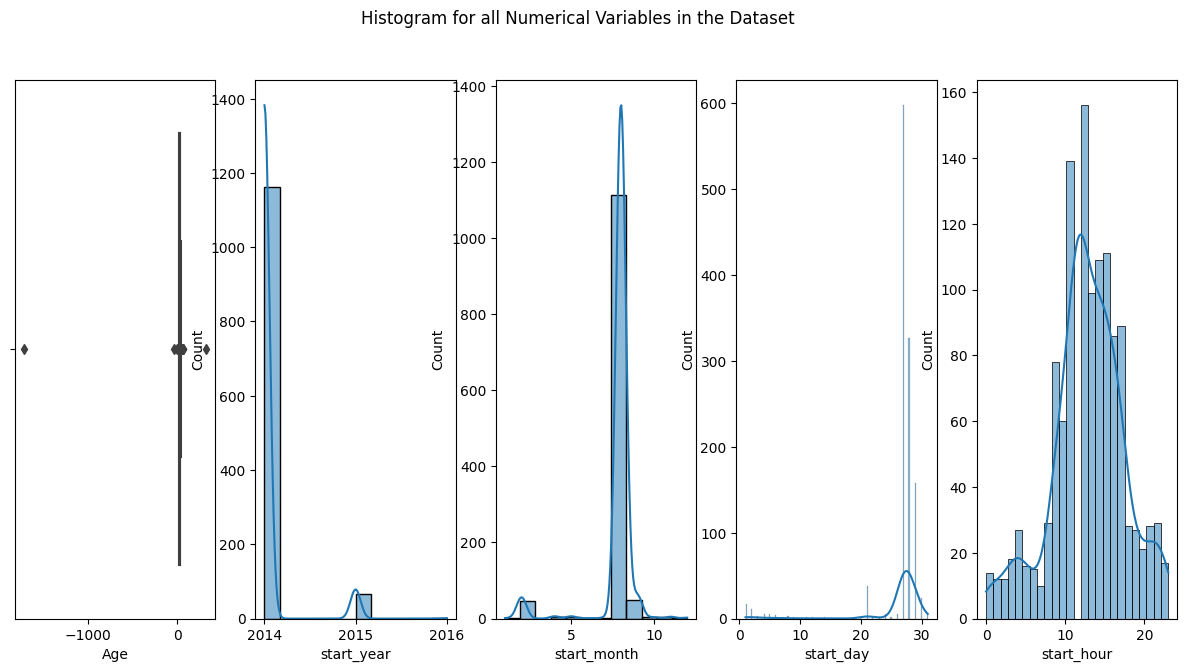

In [129]:
df.info()
fig,axes=plt.subplots(1,5,figsize=(15,7))
fig.suptitle("Histogram for all Numerical Variables in the Dataset")
sns.boxplot(x="Age",data=df,ax=axes[0])
sns.histplot(x="start_year",data=df,kde=True,ax=axes[1])
sns.histplot(x="start_month",data=df,kde=True,ax=axes[2])
sns.histplot(x="start_day",data=df,kde=True,ax=axes[3])
sns.histplot(x="start_hour",data=df,kde=True,ax=axes[4])

In [130]:
#Regardless of whether they are working remotely or not, most would not discuss mental health in the interviews.
df.groupby("work_interfere")["treatment"].value_counts()

work_interfere  treatment
Never           No           180
                Yes           30
Often           Yes          117
                No            20
Rarely          Yes          118
                No            50
Sometimes       Yes          347
                No           107
Name: treatment, dtype: int64

In [131]:
df.groupby("family_history")["treatment"].value_counts()

family_history  treatment
No              No           491
                Yes          266
Yes             Yes          350
                No           123
Name: treatment, dtype: int64

In [133]:
df.groupby("care_options")["treatment"].value_counts()

care_options  treatment
No            No           290
              Yes          203
Not sure      No           189
              Yes          117
Yes           Yes          296
              No           135
Name: treatment, dtype: int64

In [134]:
df.groupby("benefits")["treatment"].value_counts()

benefits    treatment
Don't know  No           254
            Yes          146
No          No           191
            Yes          174
Yes         Yes          296
            No           169
Name: treatment, dtype: int64

In [81]:
#Most in U.S. or a good proportion "would discuss mental health issues with co-workers."
df.groupby("Country")[["coworkers"]].value_counts()

Country         coworkers   
Australia       Some of them     11
                No                6
                Yes               4
Austria         Some of them      2
                Yes               1
                               ... 
United Kingdom  No               36
United States   Some of them    464
                No              151
                Yes             120
Uruguay         Some of them      1
Length: 85, dtype: int64

In [82]:
df.groupby("mental_health_consequence").value_counts()

mental_health_consequence  Timestamp            Age  Gender  Country        state  self_employed  family_history  treatment  work_interfere  no_employees    remote_work  tech_company  benefits    care_options  wellness_program  seek_help   anonymity   leave       phys_health_consequence  coworkers     supervisor    mental_health_interview  phys_health_interview  mental_vs_physical  obs_consequence  comments                                                                                                                                                                                                                                                                                       start_year  start_month  start_hour  start_day  week_day 
Maybe                      2014-08-27 11:39:36  42   Male    United States  WA     No             Yes             Yes        Sometimes       26-100          Yes          Yes           Yes         Yes           Yes               Yes         Yes         V

In [83]:
df.leave.value_counts()

Don't know            555
Somewhat easy         261
Very easy             201
Somewhat difficult    119
Very difficult         94
Name: leave, dtype: int64

In [84]:
#Regardless of whether the work is remote or not, the employer most of the time does not discuss the wellness program.
df.groupby("remote_work")["wellness_program"].value_counts()

remote_work  wellness_program
No           No                  571
             Yes                 171
             Don't know          120
Yes          No                  252
             Don't know           66
             Yes                  50
Name: wellness_program, dtype: int64

In [85]:
#In a lot of instances, there are no care options regardless of whether there is remote_work
df.groupby("remote_work")["care_options"].value_counts()

remote_work  care_options
No           No              344
             Yes             297
             Not sure        221
Yes          No              149
             Yes             134
             Not sure         85
Name: care_options, dtype: int64

In [86]:
#For in office work, there are beneifts provided a substantial portion of the time.
#For remote_work, there are benefits provided 1/3 of the time.
df.groupby("remote_work")["benefits"].value_counts()

remote_work  benefits  
No           Yes           352
             Don't know    275
             No            235
Yes          No            130
             Don't know    125
             Yes           113
Name: benefits, dtype: int64

[Text(0, 0, '137'), Text(0, 0, '168'), Text(0, 0, '210'), Text(0, 0, '454')]

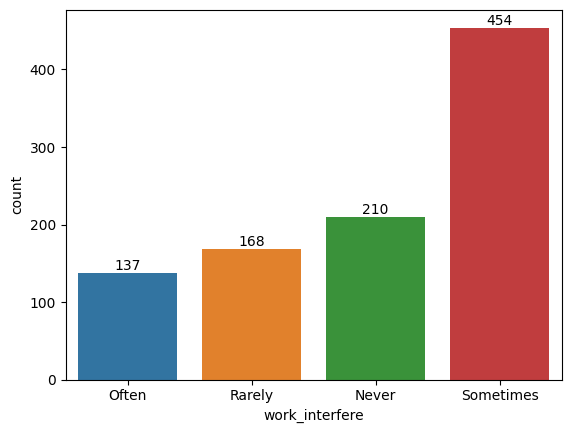

In [87]:
#Plot **work_interfere**
ax = sns.countplot(data = df , x = 'work_interfere');
#Add the value of each parametr on the Plot
ax.bar_label(ax.containers[0])

In [88]:
numericalfeatures=["Age"]
categoricalfeatures=["Gender","Country","self_employed","family_history","treatment","work_interfere","no_employees","remote_work","tech_company","anonymity","leave","mental_health_consequence","phys_health_consequence","coworkers","supervisor","mental_health_interview","phys_health_interview","mental_vs_physical","obs_consequence","benefits","care_options","wellness_program","seek_help"]


In [89]:
series=pd.Series(df["Age"])
series[series<18]=df["Age"].median()
series[series>120]=df["Age"].median()


In [90]:
df=pd.get_dummies(data=df,drop_first=True)

In [91]:
len(df)

1230

In [92]:
X=df.drop("mental_health_consequence_Yes",axis=1)
y=df["mental_health_consequence_Yes"]

In [111]:
X=df[['work_interfere_Sometimes','family_history_Yes','Age','work_interfere_Often','care_options_Yes','benefits_Yes','Gender_Male','work_interfere_Rarely','anonymity_Yes','mental_health_consequence_No','remote_work_Yes','phys_health_interview_No','coworkers_Some of them','mental_vs_physical_No','care_options_Not sure','benefits_No','supervisor_Yes','phys_health_interview_Yes','seek_help_No','Country_United States','supervisor_Some of them','obs_consequence_Yes']]
y=df["treatment_Yes"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=0)
lgr=LogisticRegression()
lgr.fit(X_train,y_train)
lgr.score(X_test,y_test)
predictions=lgr.predict(X_test)
predictions
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)
rf.feature_importances_
df1=pd.DataFrame(X.columns,rf.feature_importances_)
df1.iloc[0:50,:]
df1=df1.reset_index()
df2=df1.sort_values(by="index",ascending=False)
df2.to_csv("df3.csv")
df4=pd.DataFrame({"LogisticRegression":[score1],"DecisionTreeClassifier":[score2],"RandomForestClassifier":[score3]})
df4
df1

,index,0
0,0.159698,work_interfere_Sometimes
1,0.087417,family_history_Yes
2,0.137724,Age
3,0.083831,work_interfere_Often
4,0.042040,care_options_Yes
5,0.030110,benefits_Yes
6,0.029129,Gender_Male
7,0.051690,work_interfere_Rarely
8,0.026581,anonymity_Yes
9,0.028313,mental_health_consequence_No


In [94]:
#In this plot We can see Total number of individuals who received treatment or not.
plt.figure(figsize = (10,6));
treat = sns.countplot(data = df,  x = 'treatment');
treat.bar_label(treat.containers[0]);
plt.title('Total number of individuals who received treatment or not');

ValueError: ignored

<Figure size 1000x600 with 0 Axes>

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
#I wanna work on 'treatment' column.
X = df.drop(columns = ['treatment_Yes'])
y = df['treatment_Yes']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [97]:

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LinearRegression as LR

In [98]:
steps_rfc = [('Scaler', StandardScaler()),
             ('DT', DecisionTreeClassifier())]



clf_rfc = Pipeline(steps=steps_rfc)


clf_rfc.fit(X_train, y_train)

y_pred_rfc = clf_rfc.predict(X_test)


In [99]:
#Not self employed: 50%-50% in Treatment.
#
df.groupby("self_employed")["treatment"].value_counts()

KeyError: ignored

In [ ]:
len(y_pred_rfc)